In [249]:
#BIBLIOTECAS
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf


In [251]:
#Baixando os dados da ação em estudo, e adicionando as médias móveis mais utilizadas no mercado financeiro
df = yf.download('VALE3.SA', '2020-01-01', '2023-01-01')
df['mma20'] = df['Close'].rolling(20).mean()
df['mma100'] = df['Close'].rolling(20).mean()
df['mma200'] = df['Close'].rolling(200).mean()



[*********************100%%**********************]  1 of 1 completed


In [252]:

df['Close'] = df['Close'].shift(-1)
df

,Open,High,Low,Close,Adj Close,Volume,mma20,mma100,mma200
Date,,,,,,,,,
2020-01-02,53.980000,54.439999,53.750000,53.930000,38.042194,17509700,NaN,NaN,NaN
2020-01-03,53.680000,54.500000,53.580002,53.610001,37.762112,17284800,NaN,NaN,NaN
2020-01-06,53.799999,53.799999,53.150002,54.000000,37.538044,32787800,NaN,NaN,NaN
2020-01-07,53.500000,54.189999,53.400002,54.009998,37.811119,16326400,NaN,NaN,NaN
2020-01-08,54.200001,54.369999,53.619999,53.299999,37.818123,15298500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-23,85.279999,86.519997,85.080002,87.110001,81.185493,18656500,85.9995,85.9995,78.53170
2022-12-26,86.419998,87.540001,86.330002,89.190002,81.928505,18407500,86.2900,86.2900,78.48075
2022-12-27,88.000000,89.650002,87.470001,88.989998,83.884781,26720300,86.5275,86.5275,78.44275


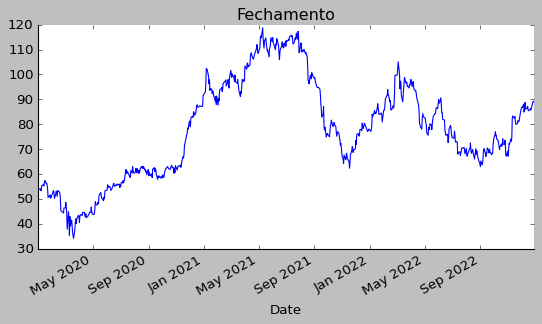

In [253]:
from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Fechamento')
plt.gca().spines[['top', 'right']].set_visible(False)

In [254]:
#Apagando os nulos e definindo a data
df.dropna(inplace=True)
df["data"] = df.index
df


,Open,High,Low,Close,Adj Close,Volume,mma20,mma100,mma200,data
Date,,,,,,,,,,
2020-10-19,62.730000,63.180000,61.950001,61.840000,45.191059,29156200,60.0655,60.0655,53.26415,2020-10-19
2020-10-20,61.779999,62.290001,61.330002,62.849998,45.110817,25276800,60.1575,60.1575,53.30170,2020-10-20
2020-10-21,61.650002,63.209999,61.599998,63.099998,45.847588,21480900,60.4095,60.4095,53.34630,2020-10-21
2020-10-22,63.110001,63.490002,62.439999,63.450001,46.029957,32097700,60.6095,60.6095,53.39375,2020-10-22
2020-10-23,62.619999,63.889999,62.220001,62.500000,46.285278,24263400,60.8490,60.8490,53.44100,2020-10-23
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,86.279999,86.650002,84.690002,86.320000,80.649399,19429200,85.7285,85.7285,78.57105,2022-12-22
2022-12-23,85.279999,86.519997,85.080002,87.110001,81.185493,18656500,85.9995,85.9995,78.53170,2022-12-23
2022-12-26,86.419998,87.540001,86.330002,89.190002,81.928505,18407500,86.2900,86.2900,78.48075,2022-12-26


In [255]:
#Reseta index
df = df.reset_index(drop=True)
df


,Open,High,Low,Close,Adj Close,Volume,mma20,mma100,mma200,data
0,62.730000,63.180000,61.950001,61.840000,45.191059,29156200,60.0655,60.0655,53.26415,2020-10-19
1,61.779999,62.290001,61.330002,62.849998,45.110817,25276800,60.1575,60.1575,53.30170,2020-10-20
2,61.650002,63.209999,61.599998,63.099998,45.847588,21480900,60.4095,60.4095,53.34630,2020-10-21
3,63.110001,63.490002,62.439999,63.450001,46.029957,32097700,60.6095,60.6095,53.39375,2020-10-22
4,62.619999,63.889999,62.220001,62.500000,46.285278,24263400,60.8490,60.8490,53.44100,2020-10-23
...,...,...,...,...,...,...,...,...,...,...
540,86.279999,86.650002,84.690002,86.320000,80.649399,19429200,85.7285,85.7285,78.57105,2022-12-22
541,85.279999,86.519997,85.080002,87.110001,81.185493,18656500,85.9995,85.9995,78.53170,2022-12-23
542,86.419998,87.540001,86.330002,89.190002,81.928505,18407500,86.2900,86.2900,78.48075,2022-12-26
543,88.000000,89.650002,87.470001,88.989998,83.884781,26720300,86.5275,86.5275,78.44275,2022-12-27


In [256]:
#Definir o número de linhas para serem treinadas
numero_linhas_treino = math.ceil(len(df) * .8)
numero_linhas_teste = math.ceil(len(df) * .2)
print(numero_linhas_treino)
print(numero_linhas_teste)

436
109


In [257]:
#Definindo as features e a label
df_completo = df
features = df.drop(['Adj Close' ,'Close', 'data'], 1)
labels = df['Close']
df

<ipython-input-257-bc8feb2c555e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df.drop(['Adj Close' ,'Close', 'data'], 1)


,Open,High,Low,Close,Adj Close,Volume,mma20,mma100,mma200,data
0,62.730000,63.180000,61.950001,61.840000,45.191059,29156200,60.0655,60.0655,53.26415,2020-10-19
1,61.779999,62.290001,61.330002,62.849998,45.110817,25276800,60.1575,60.1575,53.30170,2020-10-20
2,61.650002,63.209999,61.599998,63.099998,45.847588,21480900,60.4095,60.4095,53.34630,2020-10-21
3,63.110001,63.490002,62.439999,63.450001,46.029957,32097700,60.6095,60.6095,53.39375,2020-10-22
4,62.619999,63.889999,62.220001,62.500000,46.285278,24263400,60.8490,60.8490,53.44100,2020-10-23
...,...,...,...,...,...,...,...,...,...,...
540,86.279999,86.650002,84.690002,86.320000,80.649399,19429200,85.7285,85.7285,78.57105,2022-12-22
541,85.279999,86.519997,85.080002,87.110001,81.185493,18656500,85.9995,85.9995,78.53170,2022-12-23
542,86.419998,87.540001,86.330002,89.190002,81.928505,18407500,86.2900,86.2900,78.48075,2022-12-26
543,88.000000,89.650002,87.470001,88.989998,83.884781,26720300,86.5275,86.5275,78.44275,2022-12-27


In [258]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Separa os dados de treino teste e validação
x_treinamento = features[:numero_linhas_treino]
x_teste = features[numero_linhas_treino:numero_linhas_treino + numero_linhas_teste -1]

y_treinamento = labels[:numero_linhas_treino]
y_teste = labels[numero_linhas_treino:numero_linhas_treino + numero_linhas_teste -1]





In [259]:
#Realizar a normalização dos dados
normalizacao = MinMaxScaler()

x_treinamento_normalizado = normalizacao.fit_transform(x_treinamento)
x_teste_normalizado = normalizacao.transform(x_teste)
print( len(x_treinamento), len(y_treinamento))
print( len(x_teste), len(y_teste))


436 436
108 108


In [260]:
lr = LinearRegression().fit(x_treinamento_normalizado, y_treinamento)
predicao= lr.predict(x_teste_normalizado)
coeficiente =r2_score(y_teste, predicao)
coeficiente

0.9344912196141215

In [261]:
valor_teste = features.tail(108)
valor_teste
previsao=normalizacao.transform(valor_teste)
predicao=lr.predict(previsao)
predicao


array([70.2656016 , 70.17696809, 71.1964992 , 68.82793577, 69.0802057 ,
       69.60281883, 68.42037437, 67.36320446, 68.41317644, 68.34195369,
       69.83032262, 69.68591327, 73.35557967, 69.41353865, 67.91558923,
       70.11282466, 68.47585084, 68.18843657, 66.9395273 , 66.32141723,
       70.26905596, 68.94203352, 68.99892722, 70.29663083, 67.49917046,
       65.54788497, 65.03727445, 62.54570026, 63.64976898, 66.44995483,
       64.9170973 , 64.3566976 , 69.39076323, 70.05254043, 70.2283083 ,
       68.15882599, 68.15927682, 68.15402983, 70.55650796, 69.10185986,
       69.16307657, 70.03885812, 68.3254759 , 69.49514726, 67.90040798,
       68.70749379, 68.352542  , 72.69892666, 72.66058147, 76.03772244,
       77.57427581, 75.60949044, 78.94192444, 74.91430853, 73.32907016,
       71.92534729, 71.33830029, 70.62419526, 71.77002553, 71.43637921,
       72.71827311, 74.42528255, 72.51614053, 72.81755751, 74.72957249,
       70.20643491, 67.58651033, 69.14070516, 70.36769234, 67.18

In [262]:
#Plotagem
data_negociacao=df_completo['data']
data=data_negociacao.tail(108)

dados_real=df_completo['Close']
real=dados_real.tail(108)

df=pd.DataFrame({'data':data, 'real':real, 'previsao':predicao})

df.set_index('data', inplace=True)
df["real"]
df["previsao"]
df


,real,previsao
data,,
2022-07-26,70.519997,70.265602
2022-07-27,70.690002,70.176968
2022-07-28,69.750000,71.196499
2022-07-29,68.080002,68.827936
2022-08-01,70.250000,69.080206
...,...,...
2022-12-22,86.320000,85.458993
2022-12-23,87.110001,86.266624
2022-12-26,89.190002,87.340544


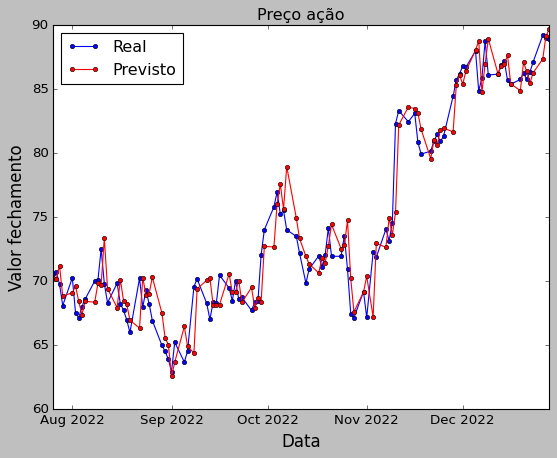

In [263]:
from matplotlib import pyplot as plt
#plotagem
plt.style.use('classic')
plt.plot(df['real'],label = "Real", linestyle='-', marker='o', color = 'blue', markersize = 4)
plt.plot(df['previsao'],label = "Previsto", linestyle='-', marker='o', color = 'red', markersize = 4)
plt.xlabel('Data', fontsize=15)
plt.ylabel('Valor fechamento', fontsize=15)
plt.title('Preço ação')
plt.legend(loc='best')
